In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm
from scipy import optimize
from scipy import interpolate
import time
import random
import pickle as pkl
import inspect
from cratrcountr import *
%matplotlib inline

In [12]:
synth_area = 10000
synth_age = 2.0
with open('example20.pkl','rb') as f:
    ds = pkl.load(f)

<Figure size 640x480 with 0 Axes>

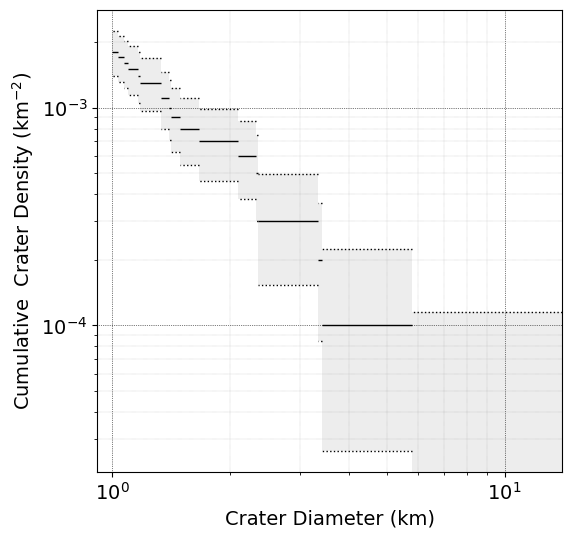

In [13]:
plot_cumulative_unbinned(
    ds, synth_area, d_min=1.0
)

<Figure size 640x480 with 0 Axes>

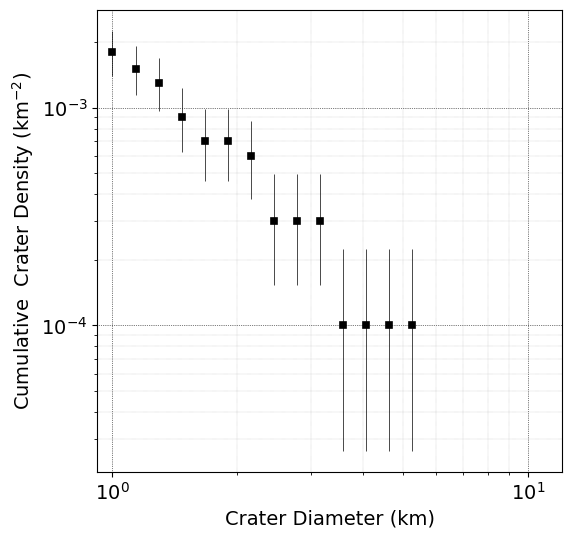

In [14]:
plot_cumulative_binned(
    ds, synth_area,
    bin_width_exponent=neukum_bwe, d_min=1.0
)

<Figure size 640x480 with 0 Axes>

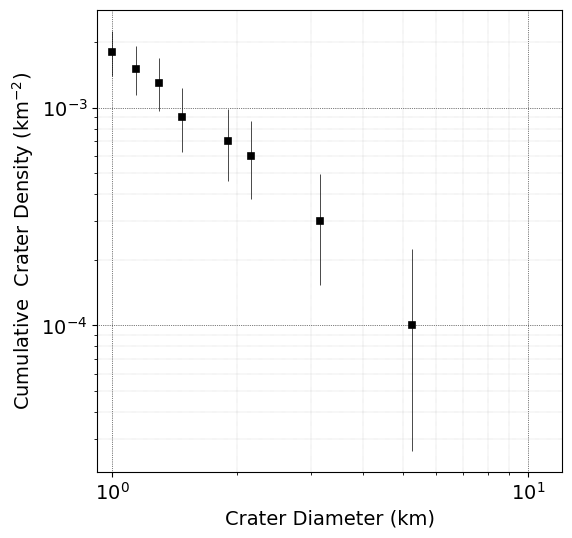

In [15]:
plot_cumulative_binned(
    ds, synth_area,
    bin_width_exponent=neukum_bwe, d_min=1.0, 
    skip_zero_crater_bins=True
)

<Figure size 640x480 with 0 Axes>

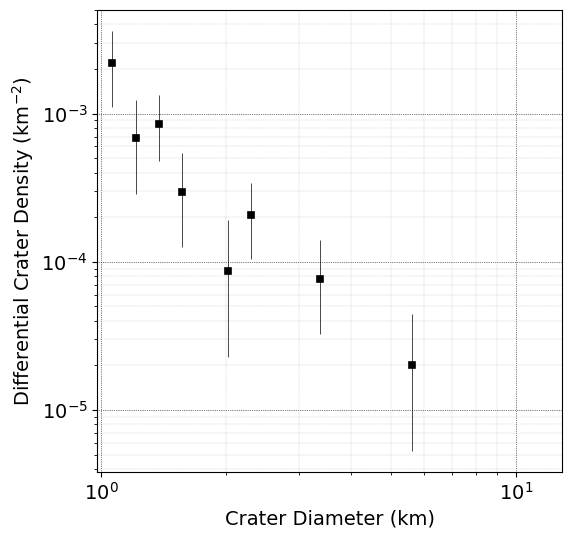

In [16]:
plot_differential(
    ds, synth_area, 
    bin_width_exponent=neukum_bwe, d_min=1.0
)

<Figure size 640x480 with 0 Axes>

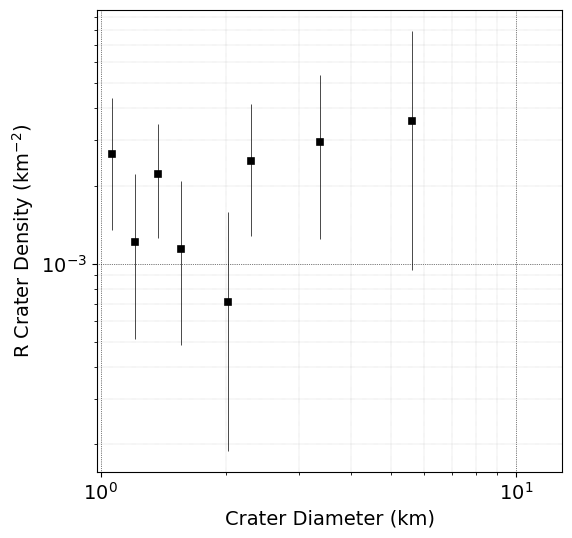

In [17]:
plot_R(
    ds, synth_area, 
    reference_point=1.0, start_at_reference_point=True
)